#### Required Libraries

In [14]:
#Importing required libraries
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Data Exploration

In [3]:
#Reading data from CSV
df = pd.read_csv('music_dataset_mod.csv')

In [4]:
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [5]:
#Creates a deep copy, any changes made to original dataframe will not affect new dataframe and vice versa
df_music = df.copy()
df_music

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [ ]:
#Observing the data
df_music.info()

#We can see there are 110 rows with unknown genres (null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [ ]:
#Types of genres in data
df_music['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

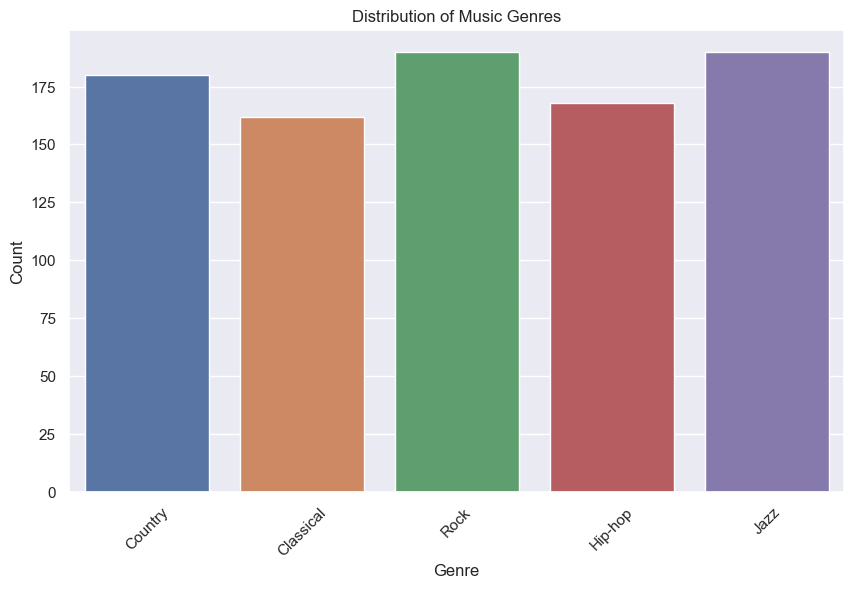

In [18]:
#Plotting all the genres 
plt.figure(figsize=(10,6))
sns.countplot(data= df_music, x='Genre')
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Correlation Analysis

In [19]:
df_music.isna().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [20]:
df_music = df_music.dropna()

In [22]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), object(1)

In [28]:
#Splitting data in features and target
x = df_music.drop(['Genre'], axis=1)
y = df_music['Genre']

In [32]:
encode = LabelEncoder()
y_encoded = encode.fit_transform(y)
y_encoded

array([1, 0, 4, 2, 1, 4, 2, 1, 1, 1, 0, 2, 2, 4, 2, 4, 3, 0, 4, 2, 1, 0,
       1, 3, 3, 4, 3, 4, 2, 1, 4, 1, 4, 0, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1,
       2, 1, 4, 1, 4, 0, 1, 1, 0, 3, 2, 4, 4, 1, 2, 0, 1, 1, 0, 3, 1, 3,
       4, 2, 2, 3, 0, 2, 1, 3, 2, 2, 0, 2, 3, 1, 0, 4, 3, 2, 0, 2, 3, 1,
       1, 0, 4, 1, 3, 2, 3, 4, 1, 1, 4, 0, 0, 1, 3, 3, 4, 4, 2, 0, 0, 1,
       3, 4, 3, 2, 3, 1, 0, 2, 1, 0, 2, 4, 4, 3, 1, 2, 4, 1, 2, 1, 2, 1,
       0, 2, 1, 2, 4, 3, 2, 1, 3, 1, 4, 1, 0, 1, 2, 2, 2, 1, 1, 2, 3, 4,
       1, 2, 2, 4, 4, 2, 0, 3, 4, 4, 1, 4, 1, 2, 3, 0, 3, 4, 4, 4, 3, 0,
       4, 0, 4, 3, 3, 2, 3, 4, 0, 1, 1, 4, 3, 2, 1, 1, 3, 2, 4, 1, 0, 2,
       1, 4, 0, 2, 2, 4, 0, 2, 3, 0, 0, 2, 4, 2, 3, 3, 4, 2, 3, 1, 1, 0,
       3, 2, 4, 3, 2, 3, 1, 4, 3, 3, 0, 3, 4, 3, 0, 4, 4, 3, 1, 1, 4, 0,
       3, 2, 3, 3, 1, 0, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 0, 4, 4, 1, 3, 2,
       3, 4, 1, 3, 4, 3, 1, 0, 4, 3, 0, 2, 2, 0, 4, 2, 4, 2, 1, 1, 0, 3,
       2, 4, 2, 1, 3, 4, 1, 2, 0, 4, 2, 4, 3, 3, 4,

In [54]:
for i, category in enumerate(encode.classes_):
    print(f"{category}: {i}")

Classical: 0
Country: 1
Hip-hop: 2
Jazz: 3
Rock: 4


In [36]:
df_music_encoded = df_music.copy()
df_music_encoded = df_music_encoded.drop(['Genre'], axis=1)
df_music_encoded['Genre Encoded'] = y_encoded
df_music_encoded


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre Encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


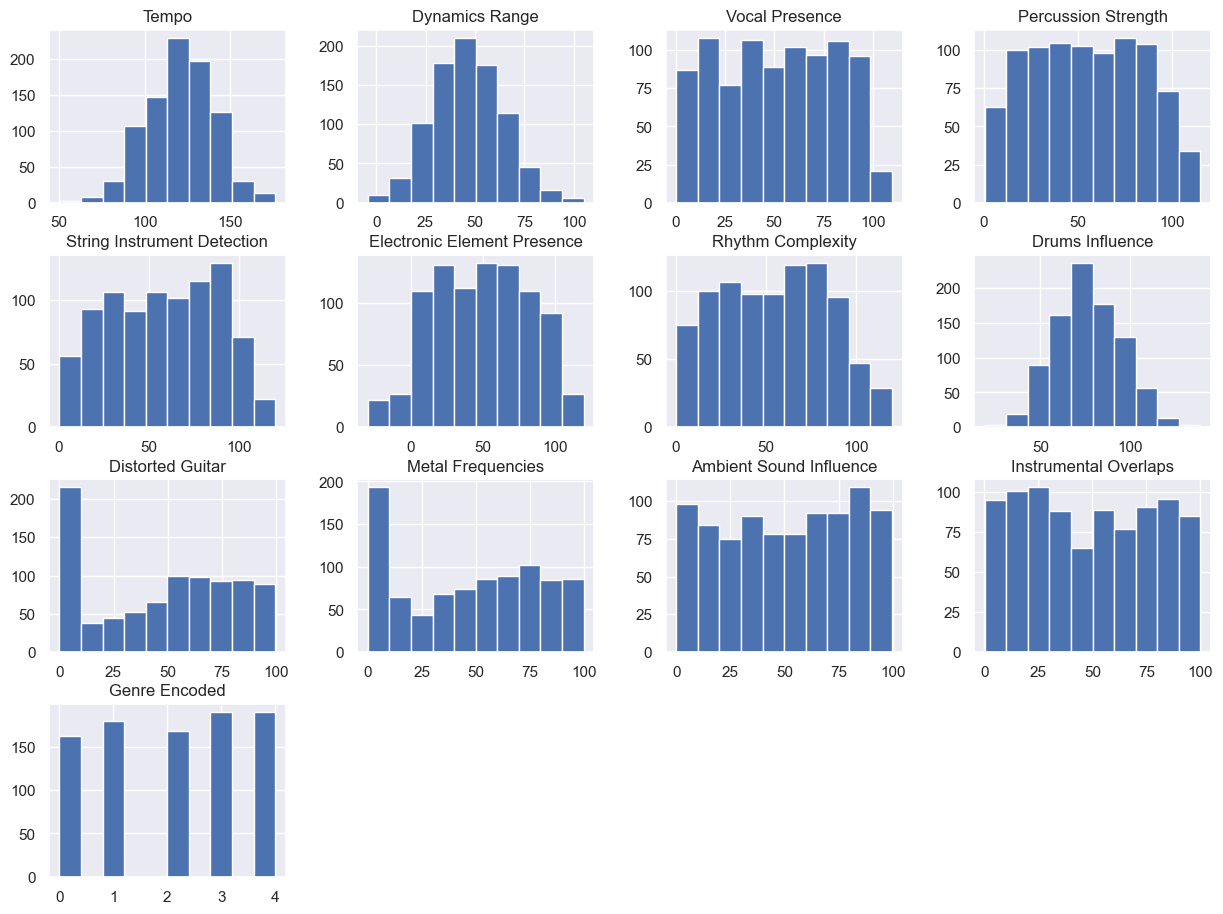

In [42]:
df_music_encoded.hist(figsize=(15,11))
plt.show()

In [ ]:
#Preparing correlation matrix
corr_matrix = df_music_encoded.corr()

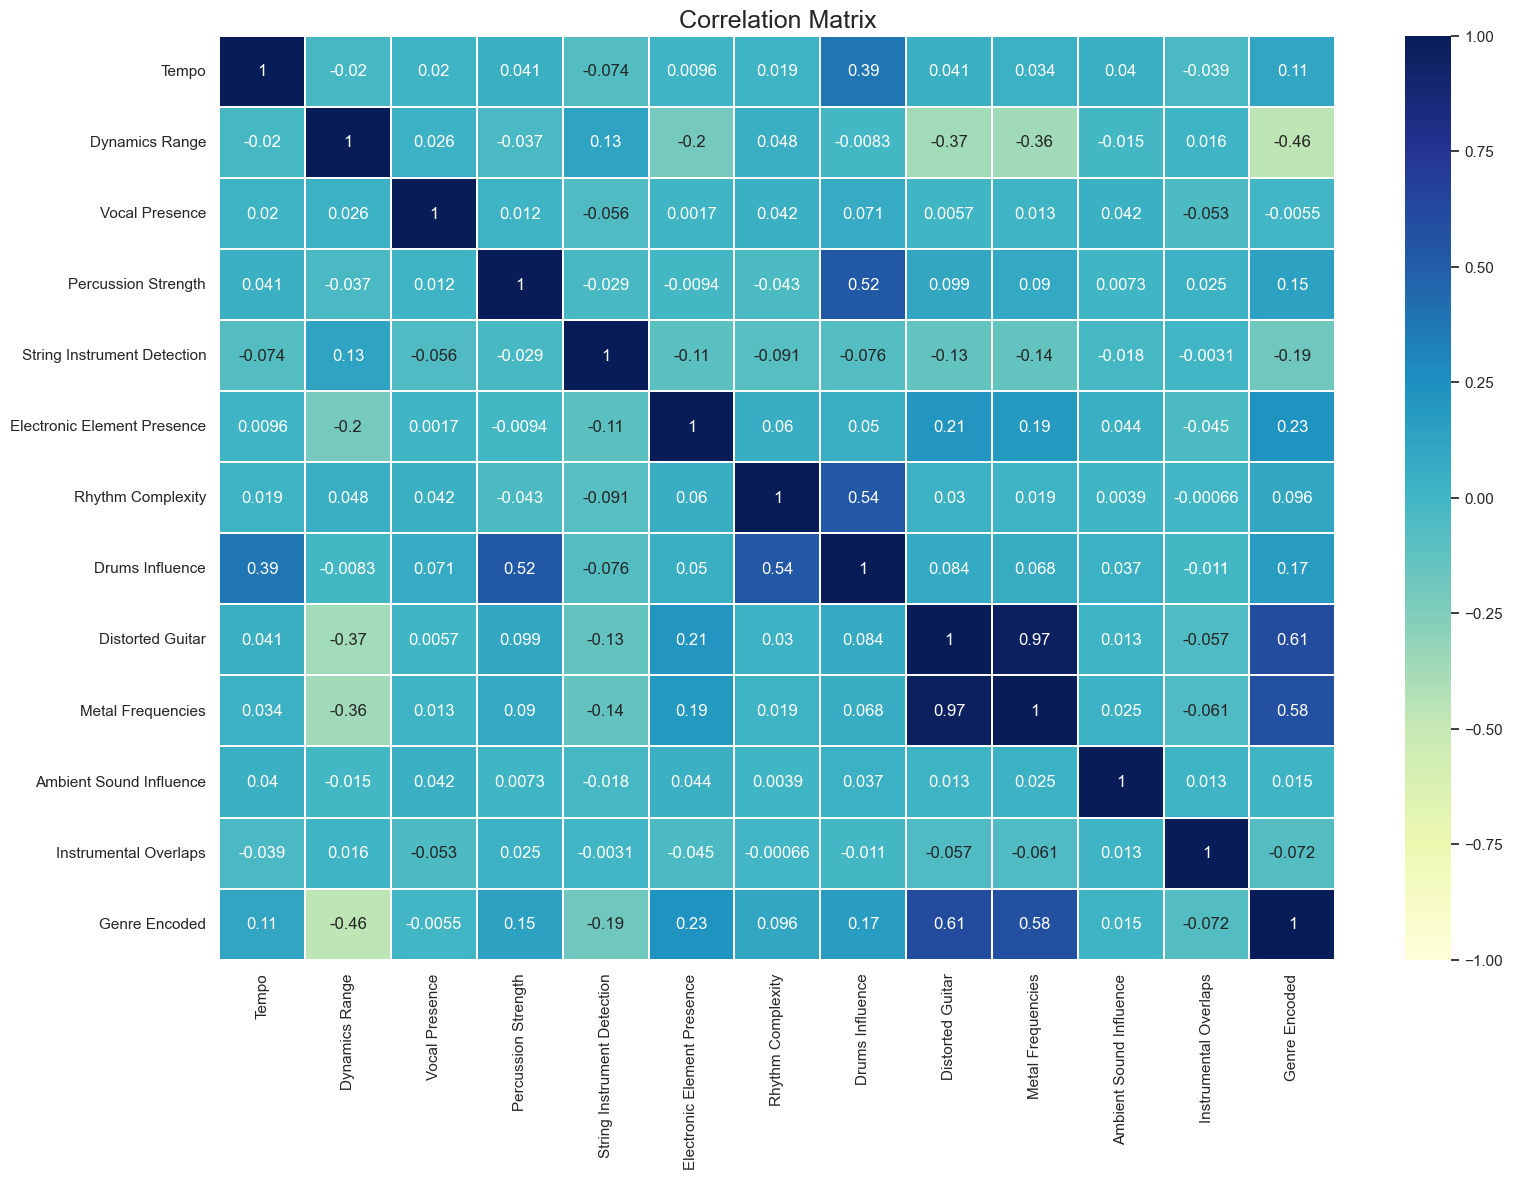

In [51]:
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='YlGnBu',
            vmax=1,
            vmin=-1,
            linewidths=0.1
            )
plt.title('Correlation Matrix', fontsize=18)
plt.yticks(rotation=0)
plt.show()

#### PCA for Dimensionality Reduction

In [60]:
#Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.32276419,  0.63236264,  0.05320844, ...,  0.76493507,
         1.53633887,  0.16037718],
       [-0.21834523,  1.26791613,  1.52189513, ..., -1.4654764 ,
        -1.15313543, -1.16143819],
       [ 0.37404526,  0.35132812,  0.48306804, ...,  1.26039216,
         1.49165303, -0.81044425],
       ...,
       [ 0.03876913,  0.26524849, -0.61672579, ...,  1.51998929,
        -1.55523377,  0.8709389 ],
       [-1.2146319 , -1.52681996,  0.37815922, ...,  0.24787354,
        -1.00171631, -0.83061884],
       [-2.53711957, -0.76059346,  0.38551088, ..., -0.07983057,
         1.23101564,  0.9959692 ]])

In [62]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  0.74994362,
        -0.41133069, -0.20089952],
       [ 1.86454175,  2.72389526, -0.06110915, ..., -0.46808373,
        -0.06524083, -0.03262838],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  1.12924615,
        -0.20497339,  0.13108671],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ...,  0.61746001,
         0.86535466,  0.11015801],
       [-0.59721268, -2.33887467, -0.91433944, ..., -0.92203511,
        -0.11584256, -0.27384145],
       [ 0.33474784, -0.75956161,  0.16804437, ..., -0.96472679,
        -0.77845888,  0.16213001]])

In [63]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

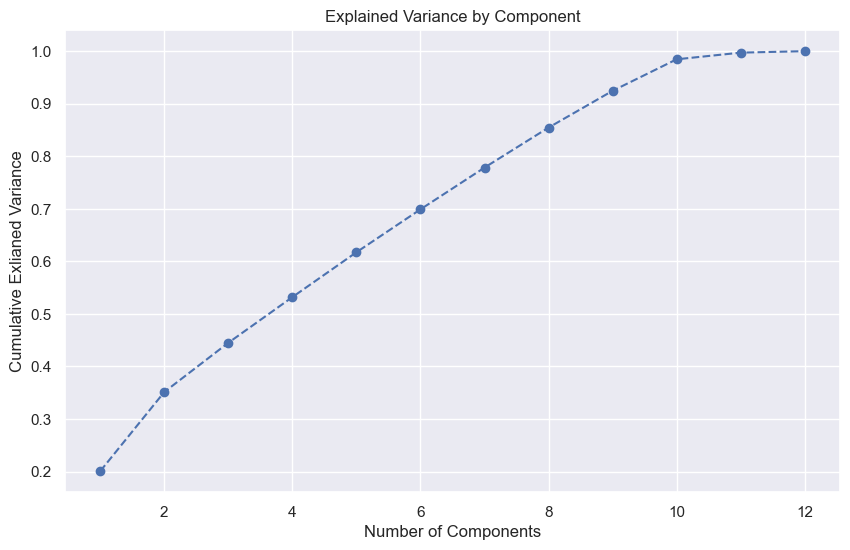

In [64]:
#Plotting the cumulative variance 
plt.figure(figsize=(10,6))
plt.plot(range(1,13), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Component')
plt.ylabel('Cumulative Exlianed Variance')
plt.xlabel('Number of Components')
plt.show()

In [65]:
#Examining PCA results and deciding principal components
pca = PCA(n_components=8)
x_pca = pca.fit_transform(x_scaled)

### Evaluating Classification Efficacy: PCA-Transformed vs. Original Data

#### Logistic Regression with PCs

In [66]:
#Splitting data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_encoded, test_size=0.2, random_state=30)

In [68]:
#Training a LogisticRegression Model
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict and evaluate model 
y_pred = lgr.predict(X_test)
print(f"Accuracy with PCA:", accuracy_score(y_test, y_pred))
print(f"\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encode.classes_))

Accuracy with PCA: 0.5786516853932584

Classification Report:
               precision    recall  f1-score   support

   Classical       0.92      0.92      0.92        39
     Country       0.33      0.24      0.28        34
     Hip-hop       0.54      0.45      0.49        31
        Jazz       0.49      0.53      0.51        40
        Rock       0.52      0.71      0.60        34

    accuracy                           0.58       178
   macro avg       0.56      0.57      0.56       178
weighted avg       0.57      0.58      0.57       178



#### Logistic Regression with original features

In [78]:
#Splitting the original data in train and test set
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(x_scaled, y_encoded, train_size=0.2, random_state=30)

In [80]:
#Training model on original data
lgr_og = LogisticRegression()
lgr_og.fit(X_train_og, y_train_og)

LogisticRegression()

In [83]:
#Predict and evaluate model with original features
y_pred_og = lgr_og.predict(X_test_og)
print(f"Accuracy with PCA:", accuracy_score(y_test_og, y_pred_og))
print(f"\nClassification Report:\n", classification_report(y_test_og, y_pred_og, target_names=encode.classes_))


Accuracy with PCA: 0.5491573033707865

Classification Report:
               precision    recall  f1-score   support

   Classical       0.85      0.92      0.88       135
     Country       0.40      0.39      0.40       144
     Hip-hop       0.60      0.36      0.45       137
        Jazz       0.46      0.46      0.46       151
        Rock       0.48      0.63      0.54       145

    accuracy                           0.55       712
   macro avg       0.56      0.55      0.55       712
weighted avg       0.55      0.55      0.54       712



### Genre Prediction and Integration

In [87]:
#Finding null values in resultset
df_og_null = df[df['Genre'].isnull()].copy()
df_og_null

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [88]:
#Preparing data for prediction
X_unknown = df_og_null.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

#Predict the genres
y_unknown_pred = lgr.predict(X_unknown_pca)